EMOTION RECOGNITION OF SPEECH USING ACOUSTIC AND LINGUISTIC FEATURES

In [2]:
## IMPORT STATEMENTS
import numpy 
import pandas as pd
import sounddevice as sd
import scipy.io.wavfile as wf
from scipy.fftpack import dct
import matplotlib.pyplot as plt
%matplotlib inline
import os

import io
from scipy.io.wavfile import read

import wave

def normalize_wav(input_file, output_file):
    with wave.open(input_file, "rb") as r_wav, wave.open(output_file, "wb") as w_wav:
        w_wav.setparams(r_wav.getparams())
        w_wav.writeframes(r_wav.readframes(w_wav.getnframes()))
mfcc_list = []
sample_rate = 48000


In [ ]:
# The code for MFCC feature extraction inspired from https://github.com/pchao6/Speech_Feature_Extraction

In [ ]:
#Feature Extraction

In [ ]:
df1 = pd.DataFrame()
for root, dirs, files in os.walk('C:/Users/Monisri/Documents/speech/Audio_Speech_Actors_01-06/'):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            buff = wave.open(os.path.join(root, file), 'r')
            signal = buff.readframes(-1)
            signal = numpy.fromstring(signal, 'Int16')
            
            signal = signal[0:int(3.0 * sample_rate)] 
            plt.plot(signal, c='b')
            pre_emphasis = 0.9
            emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1]) #Pre Emphasis
            plt.plot(emphasized_signal, c='b')
            frame_size = 0.025
            frame_stride = 0.01

           
            frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate

            signal_length = len(emphasized_signal)
            frame_length = int(round(frame_length))
            frame_step = int(round(frame_step))
            
           
            num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))

            pad_signal_length = num_frames * frame_step + frame_length
            z = numpy.zeros((pad_signal_length - signal_length))
            pad_signal = numpy.append(emphasized_signal, z)

            indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, 
                            num_frames * frame_step, frame_step), (frame_length, 1)).T
            frames = pad_signal[indices.astype(numpy.int32, copy=False)]
            frames *= numpy.hamming(frame_length)
            NFFT = 512 # or 256
            mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
            pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum
            nfilt = 40
            low_freq_mel = 0
            high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  
            mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  
            hz_points = (700 * (10**(mel_points / 2595) - 1))  
            bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

            fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
            for m in range(1, nfilt + 1):
                f_m_minus = int(bin[m - 1])   # left
                f_m = int(bin[m])             # center
                f_m_plus = int(bin[m + 1])    # right

                for k in range(f_m_minus, f_m):
                    fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
                for k in range(f_m, f_m_plus):
                    fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
            filter_banks = numpy.dot(pow_frames, fbank.T)
            filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks) 
            filter_banks = 20 * numpy.log10(filter_banks)  # dB
            num_ceps = 12
            cep_lifter = 22 
            mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] 
            (nframes, ncoeff) = mfcc.shape
            n = numpy.arange(ncoeff)
            lift = 1 + (cep_lifter / 2) * numpy.sin(numpy.pi * n / cep_lifter)
            mfcc *= lift
            filter_banks -= (numpy.mean(filter_banks, axis=0) + 1e-8)
            mfcc -= (numpy.mean(mfcc, axis=0) + 1e-8)
        
            df = pd.DataFrame(mfcc)
            df['File_name'] = file
            df.head(2)
        df1 = df1.append(df)

           

C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [3]:
len(df1)

107280

C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  import sys
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


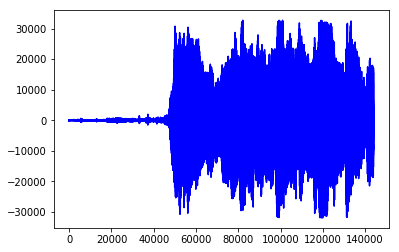

In [4]:
for root, dirs, files in os.walk('C:/Users/Monisri/Documents/speech/Audio_Speech_Actors_07-12/'):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            #buff = wave.open("C:/Users/Monisri/Documents/speech/Audio_Speech_Actors_01-24/"+file,'r')
            buff = wave.open(os.path.join(root, file), 'r')
            signal = buff.readframes(-1)
            signal = numpy.fromstring(signal, 'Int16')
            #sample_rate , signal = wf.read('C:/Users/Monisri/Documents/speech/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav', mmap = True) # 8kHz
            signal = signal[0:int(3.0 * sample_rate)]  # Keep the first 3.5 seconds
            plt.plot(signal, c='b')
            pre_emphasis = 0.9
            emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1]) #Perfect
            plt.plot(emphasized_signal, c='b')
            #sd.play(emphasized_signal)
            frame_size = 0.025
            frame_stride = 0.01

            # Convert from seconds to samples
            frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate

            signal_length = len(emphasized_signal)
            frame_length = int(round(frame_length))
            frame_step = int(round(frame_step))
            # Make sure that we have at least 1 frame
            num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))

            pad_signal_length = num_frames * frame_step + frame_length
            z = numpy.zeros((pad_signal_length - signal_length))
            pad_signal = numpy.append(emphasized_signal, z)

            indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, 
                            num_frames * frame_step, frame_step), (frame_length, 1)).T
            frames = pad_signal[indices.astype(numpy.int32, copy=False)]
            frames *= numpy.hamming(frame_length)
            NFFT = 512 # or 256
            mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
            pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum
            nfilt = 40
            low_freq_mel = 0
            high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
            mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
            hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
            bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

            fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
            for m in range(1, nfilt + 1):
                f_m_minus = int(bin[m - 1])   # left
                f_m = int(bin[m])             # center
                f_m_plus = int(bin[m + 1])    # right

                for k in range(f_m_minus, f_m):
                    fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
                for k in range(f_m, f_m_plus):
                    fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
            filter_banks = numpy.dot(pow_frames, fbank.T)
            filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
            filter_banks = 20 * numpy.log10(filter_banks)  # dB
            num_ceps = 12
            cep_lifter = 22 #refers to the dimensionality of the MFCC vector in the original formulation.

            mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13
            (nframes, ncoeff) = mfcc.shape
            n = numpy.arange(ncoeff)
            lift = 1 + (cep_lifter / 2) * numpy.sin(numpy.pi * n / cep_lifter)
            mfcc *= lift
            filter_banks -= (numpy.mean(filter_banks, axis=0) + 1e-8)
            mfcc -= (numpy.mean(mfcc, axis=0) + 1e-8)
        
            df = pd.DataFrame(mfcc)
            df['File_name'] = file
            df.head(2)
        df1 = df1.append(df)

           

C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


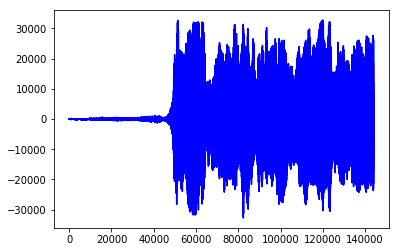

In [5]:
import sys
for root, dirs, files in os.walk('C:/Users/Monisri/Documents/speech/Audio_Speech_Actors_13-18/'):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            #buff = wave.open("C:/Users/Monisri/Documents/speech/Audio_Speech_Actors_01-24/"+file,'r')
            buff = wave.open(os.path.join(root, file), 'r')
            signal = buff.readframes(-1)
            signal = numpy.fromstring(signal, 'Int16')
            #sample_rate , signal = wf.read('C:/Users/Monisri/Documents/speech/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav', mmap = True) # 8kHz
            signal = signal[0:int(3.0 * sample_rate)]  # Keep the first 3.5 seconds
            plt.plot(signal, c='b')
            pre_emphasis = 0.9
            emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1]) #Perfect
            plt.plot(emphasized_signal, c='b')
            #sd.play(emphasized_signal)
            frame_size = 0.025
            frame_stride = 0.01

            # Convert from seconds to samples
            frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate

            signal_length = len(emphasized_signal)
            frame_length = int(round(frame_length))
            frame_step = int(round(frame_step))
            # Make sure that we have at least 1 frame
            num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))

            pad_signal_length = num_frames * frame_step + frame_length
            z = numpy.zeros((pad_signal_length - signal_length))
            pad_signal = numpy.append(emphasized_signal, z)

            indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, 
                            num_frames * frame_step, frame_step), (frame_length, 1)).T
            frames = pad_signal[indices.astype(numpy.int32, copy=False)]
            frames *= numpy.hamming(frame_length)
            NFFT = 512 # or 256
            mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
            pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum
            nfilt = 40
            low_freq_mel = 0
            high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
            mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
            hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
            bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

            fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
            for m in range(1, nfilt + 1):
                f_m_minus = int(bin[m - 1])   # left
                f_m = int(bin[m])             # center
                f_m_plus = int(bin[m + 1])    # right

                for k in range(f_m_minus, f_m):
                    fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
                for k in range(f_m, f_m_plus):
                    fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
            filter_banks = numpy.dot(pow_frames, fbank.T)
            filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
            filter_banks = 20 * numpy.log10(filter_banks)  # dB
            num_ceps = 12
            cep_lifter = 22 #refers to the dimensionality of the MFCC vector in the original formulation.

            mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13
            (nframes, ncoeff) = mfcc.shape
            n = numpy.arange(ncoeff)
            lift = 1 + (cep_lifter / 2) * numpy.sin(numpy.pi * n / cep_lifter)
            mfcc *= lift
            filter_banks -= (numpy.mean(filter_banks, axis=0) + 1e-8)
            mfcc -= (numpy.mean(mfcc, axis=0) + 1e-8)
        
            df = pd.DataFrame(mfcc)
            df['File_name'] = file
            df.head(2)
        df1 = df1.append(df)

           

C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  import sys
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


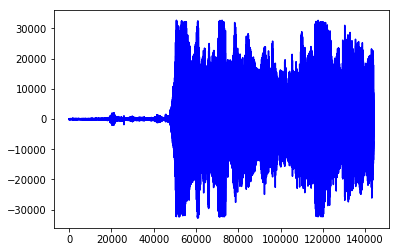

In [6]:
for root, dirs, files in os.walk('C:/Users/Monisri/Documents/speech/Audio_Speech_Actors_19-24/'):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            #buff = wave.open("C:/Users/Monisri/Documents/speech/Audio_Speech_Actors_01-24/"+file,'r')
            buff = wave.open(os.path.join(root, file), 'r')
            signal = buff.readframes(-1)
            signal = numpy.fromstring(signal, 'Int16')
            #sample_rate , signal = wf.read('C:/Users/Monisri/Documents/speech/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav', mmap = True) # 8kHz
            signal = signal[0:int(3.0 * sample_rate)]  # Keep the first 3.5 seconds
            plt.plot(signal, c='b')
            pre_emphasis = 0.9
            emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1]) #Perfect
            plt.plot(emphasized_signal, c='b')
            #sd.play(emphasized_signal)
            frame_size = 0.025
            frame_stride = 0.01

            # Convert from seconds to samples
            frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate

            signal_length = len(emphasized_signal)
            frame_length = int(round(frame_length))
            frame_step = int(round(frame_step))
            # Make sure that we have at least 1 frame
            num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))

            pad_signal_length = num_frames * frame_step + frame_length
            z = numpy.zeros((pad_signal_length - signal_length))
            pad_signal = numpy.append(emphasized_signal, z)

            indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, 
                            num_frames * frame_step, frame_step), (frame_length, 1)).T
            frames = pad_signal[indices.astype(numpy.int32, copy=False)]
            frames *= numpy.hamming(frame_length)
            NFFT = 512 # or 256
            mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
            pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum
            nfilt = 40
            low_freq_mel = 0
            high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
            mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
            hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
            bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

            fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
            for m in range(1, nfilt + 1):
                f_m_minus = int(bin[m - 1])   # left
                f_m = int(bin[m])             # center
                f_m_plus = int(bin[m + 1])    # right

                for k in range(f_m_minus, f_m):
                    fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
                for k in range(f_m, f_m_plus):
                    fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
            filter_banks = numpy.dot(pow_frames, fbank.T)
            filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
            filter_banks = 20 * numpy.log10(filter_banks)  # dB
            num_ceps = 12
            cep_lifter = 22 #refers to the dimensionality of the MFCC vector in the original formulation.

            mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13
            (nframes, ncoeff) = mfcc.shape
            n = numpy.arange(ncoeff)
            lift = 1 + (cep_lifter / 2) * numpy.sin(numpy.pi * n / cep_lifter)
            mfcc *= lift
            filter_banks -= (numpy.mean(filter_banks, axis=0) + 1e-8)
            mfcc -= (numpy.mean(mfcc, axis=0) + 1e-8)
        
            df = pd.DataFrame(mfcc)
            df['File_name'] = file
            df.head(2)
        df1 = df1.append(df)

           

In [7]:
len(df1)

446991

In [8]:
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,File_name
0,-111.282206,24.431393,26.290127,85.855755,-86.023798,-6.558201,21.828315,54.364605,-110.716876,91.738602,104.688967,-240.262917,03-01-01-01-01-01-01.wav
1,46.007877,-33.175053,-35.323348,-24.558148,-88.339046,19.851486,-22.895110,49.502309,4.501469,26.050960,58.278131,-30.493541,03-01-01-01-01-01-01.wav
2,46.007877,-33.175053,-35.323348,-24.558148,-88.339046,19.851486,-22.895110,49.502309,4.501469,26.050960,58.278131,-30.493541,03-01-01-01-01-01-01.wav
3,46.007877,-33.175053,-35.323348,-24.558148,-88.339046,19.851486,-22.895110,49.502309,4.501469,26.050960,58.278131,-30.493541,03-01-01-01-01-01-01.wav
4,-118.978318,-35.247717,-73.371340,-5.147461,-87.155436,44.065728,-21.004767,58.602374,-6.052401,30.478373,51.903283,-33.311260,03-01-01-01-01-01-01.wav
5,46.007877,-33.175053,-35.323348,-24.558148,-88.339046,19.851486,-22.895110,49.502309,4.501469,26.050960,58.278131,-30.493541,03-01-01-01-01-01-01.wav
6,-116.989119,-11.074386,-43.958703,62.754589,81.907777,186.914431,177.297135,164.613978,-65.072602,7.033699,-93.747429,-142.773381,03-01-01-01-01-01-01.wav
7,46.007877,-33.175053,-35.323348,-24.558148,-88.339046,19.851486,-22.895110,49.502309,4.501469,26.050960,58.278131,-30.493541,03-01-01-01-01-01-01.wav
8,-113.807604,-15.360732,-39.803323,82.317757,-87.946138,-13.378770,-127.804595,110.233175,203.474105,185.532534,64.223575,48.780576,03-01-01-01-01-01-01.wav
9,-104.267174,5.011759,-66.577312,56.924288,-66.550183,-60.677675,-25.572664,125.121760,161.937738,7.547027,176.065604,75.496361,03-01-01-01-01-01-01.wav


In [9]:
df1.to_csv('mfcc.csv')

In [47]:
df1 = pd.read_csv('mfcc.csv')

In [48]:
#df1.head(10)
df1 = df1.drop(df1.columns[[0]], axis = 1)

In [49]:
df1['Emotion'] = df1['File_name'].apply(lambda s:s[7:8])
df1['Intensity'] = df1['File_name'].apply(lambda s:s[10:11])
df1['Statement'] = df1['File_name'].apply(lambda s:s[13:14])
df1['Repetition'] = df1['File_name'].apply(lambda s:s[16:17])
df1['Actor'] = df1['File_name'].apply(lambda s:s[18:20])
df1['Gender'] = df1['Actor'].apply(lambda s: 1 if int(s) % 2 == 0 else 0)
df1['UniqueID'] = df1['Emotion']+df1['Statement']+df1['Actor']


In [50]:
#df1.drop( df1[ df1['Emotion'] == 7 ].index , inplace=True)
df1 = df1[df1['Emotion'] != '7']
df1 = df1[df1["Emotion"] != '6']
df1 = df1[df1["Emotion"] != '8']
df1 = df1[df1["Emotion"] != '2']


In [51]:
#df1 = df1.drop(columns=['File_name'])
df1['Emotion'] = df1['Emotion'].map({'1': 0, '3': 1, '4': 2, '5': 3})


In [52]:
df1['Emotion'] = pd.to_numeric(df1['Emotion'], downcast = 'float')
len(df1)

208600

In [53]:
df1.Emotion = df1.Emotion.astype(int)

df1.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,File_name,Emotion,Intensity,Statement,Repetition,Actor,Gender,UniqueID
0,-111.282206,24.431393,26.290127,85.855755,-86.023798,-6.558201,21.828315,54.364605,-110.716876,91.738602,104.688967,-240.262917,03-01-01-01-01-01-01.wav,0,1,1,1,01,0,1101
1,46.007877,-33.175053,-35.323348,-24.558148,-88.339046,19.851486,-22.895110,49.502309,4.501469,26.050960,58.278131,-30.493541,03-01-01-01-01-01-01.wav,0,1,1,1,01,0,1101
2,46.007877,-33.175053,-35.323348,-24.558148,-88.339046,19.851486,-22.895110,49.502309,4.501469,26.050960,58.278131,-30.493541,03-01-01-01-01-01-01.wav,0,1,1,1,01,0,1101
3,46.007877,-33.175053,-35.323348,-24.558148,-88.339046,19.851486,-22.895110,49.502309,4.501469,26.050960,58.278131,-30.493541,03-01-01-01-01-01-01.wav,0,1,1,1,01,0,1101
4,-118.978318,-35.247717,-73.371340,-5.147461,-87.155436,44.065728,-21.004767,58.602374,-6.052401,30.478373,51.903283,-33.311260,03-01-01-01-01-01-01.wav,0,1,1,1,01,0,1101


In [54]:
df1.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,File_name,Emotion,Intensity,Statement,Repetition,Actor,Gender,UniqueID
0,-111.282206,24.431393,26.290127,85.855755,-86.023798,-6.558201,21.828315,54.364605,-110.716876,91.738602,104.688967,-240.262917,03-01-01-01-01-01-01.wav,0,1,1,1,01,0,1101
1,46.007877,-33.175053,-35.323348,-24.558148,-88.339046,19.851486,-22.895110,49.502309,4.501469,26.050960,58.278131,-30.493541,03-01-01-01-01-01-01.wav,0,1,1,1,01,0,1101
2,46.007877,-33.175053,-35.323348,-24.558148,-88.339046,19.851486,-22.895110,49.502309,4.501469,26.050960,58.278131,-30.493541,03-01-01-01-01-01-01.wav,0,1,1,1,01,0,1101
3,46.007877,-33.175053,-35.323348,-24.558148,-88.339046,19.851486,-22.895110,49.502309,4.501469,26.050960,58.278131,-30.493541,03-01-01-01-01-01-01.wav,0,1,1,1,01,0,1101
4,-118.978318,-35.247717,-73.371340,-5.147461,-87.155436,44.065728,-21.004767,58.602374,-6.052401,30.478373,51.903283,-33.311260,03-01-01-01-01-01-01.wav,0,1,1,1,01,0,1101


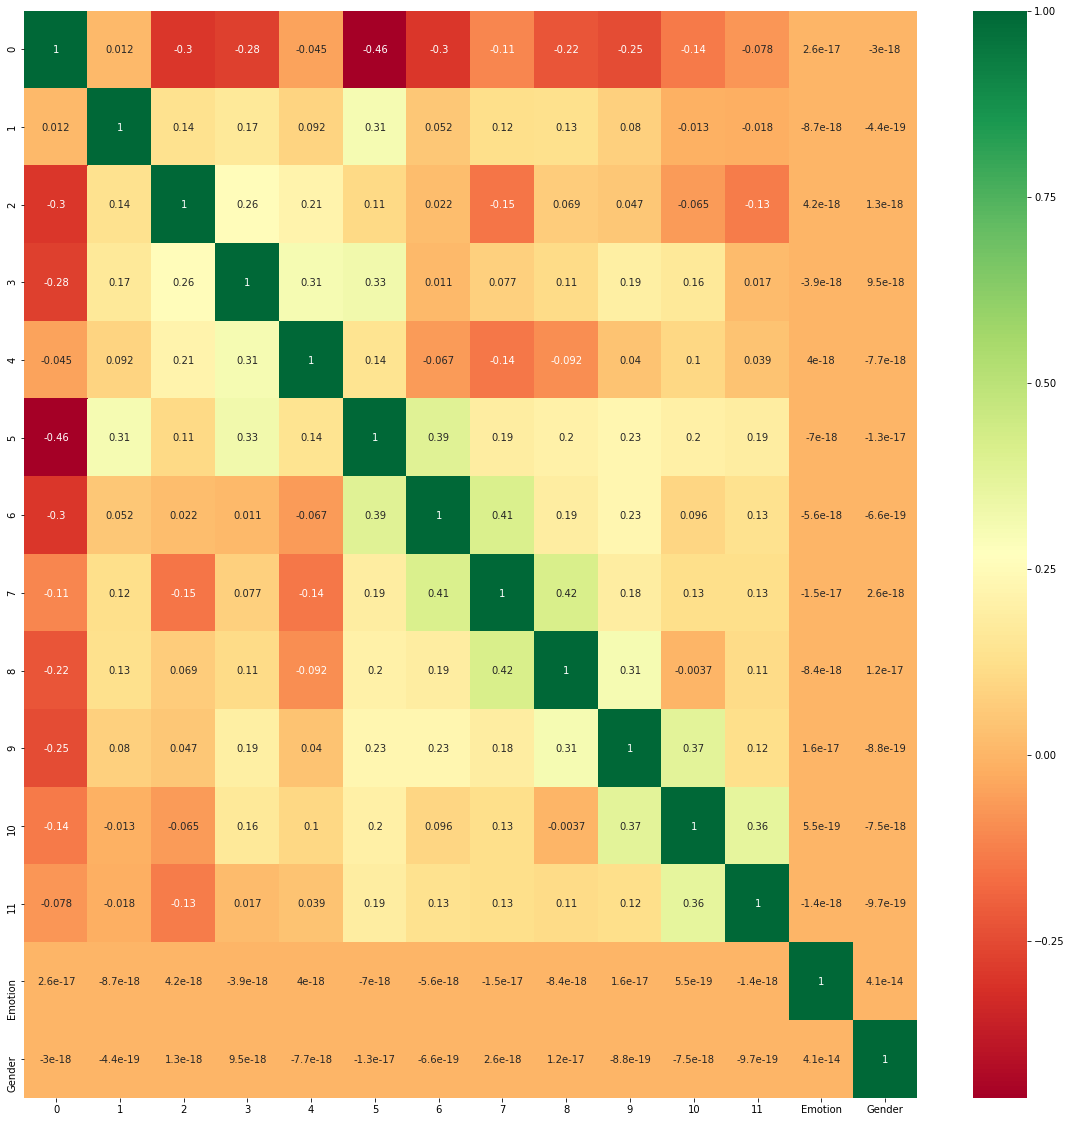

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
Y = df1[['Emotion']].values # targets
X = df1[['0','1','2','3','4','5','6','7','8','9','10','11','Gender','Intensity','Statement','Repetition','Actor']].values
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")
 

In [58]:
from sklearn.model_selection import train_test_split

Y = df1['Emotion'].values # targets
X = df1[['0','1','2','3','4','5','6','7','8','9','10','11','Actor']].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42) # random state for reproducability
#,'Intensity','Statement','Repetition',

In [59]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

X_train (156450, 13)
X_test (52150, 13)
Y_train (156450,)
Y_test (52150,)


In [60]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (14, 14):
        U, s, Vt = numpy.linalg.svd(covariance)
        angle = numpy.degrees(numpy.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * numpy.sqrt(s)
    else:
        angle = 0
        width, height = 2 * numpy.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [62]:
n_classes = len(numpy.unique(Y_train))
print(n_classes)

4


In [64]:
##K-Nearest Neighbors

In [65]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, Y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [24]:

y_pred = classifier.predict(X_test)  

In [25]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, y_pred))  
print(classification_report(Y_test, y_pred))

[[2832 1840 2028  779]
 [2033 7496 3295 2095]
 [2361 3901 6771 1801]
 [1577 4325 3304 5712]]
              precision    recall  f1-score   support

           0       0.32      0.38      0.35      7479
           1       0.43      0.50      0.46     14919
           2       0.44      0.46      0.45     14834
           3       0.55      0.38      0.45     14918

   micro avg       0.44      0.44      0.44     52150
   macro avg       0.43      0.43      0.43     52150
weighted avg       0.45      0.44      0.44     52150



In [26]:
from sklearn.metrics import accuracy_score 

acc = accuracy_score(Y_test, y_pred)


In [27]:
print(acc)

0.43741131351869605


In [ ]:
#Gaussian Mixture Model

In [234]:
def make_ellipses(gmm, ax):
    for n, color in enumerate('rgb'):
        v, w = np.linalg.eigh(GaussianMixture.covariance_()[n][:2, :2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v *= 9
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

TRAIN: [ 50362  50363  50364 ... 208597 208598 208599] TEST: [    0     1     2 ... 56617 56618 56619]
TRAIN: [     0      1      2 ... 208597 208598 208599] TEST: [ 50362  50363  50364 ... 107277 107278 107279]
TRAIN: [     0      1      2 ... 208597 208598 208599] TEST: [100724 100725 100726 ... 157937 157938 157939]
TRAIN: [     0      1      2 ... 157937 157938 157939] TEST: [151086 151087 151088 ... 208597 208598 208599]


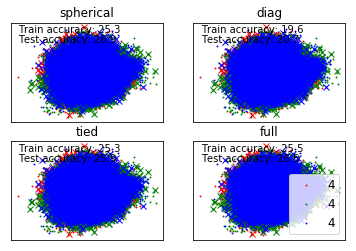

In [386]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4)
skf.get_n_splits(X,Y)

for train_index, test_index in skf.split(X,Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train = X[train_index]
    Y_train = Y[train_index]
    X_test = X[test_index]
    Y_test = Y[test_index]
    
from sklearn.externals.six.moves import xrange
from sklearn.mixture import GaussianMixture
n_classes = len(numpy.unique(Y_train))
classifiers = dict((covar_type, GaussianMixture(n_components=n_classes,
                    covariance_type=covar_type))
                   for covar_type in ['spherical', 'diag', 'tied', 'full'])

n_classifiers = len(classifiers)



for index, (name, classifier) in enumerate(classifiers.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    classifier.means_ = numpy.array([X_train[Y_train == i].mean(axis=0)
                                  for i in xrange(n_classes)])

    classifier.fit(X_train)  
    h = plt.subplot(2, n_classifiers / 2, index + 1)
    #make_ellipses(classifier, h)

    for n, color in enumerate('rgb'):
        data = X[Y == n]
        plt.scatter(data[:, 0], data[:, 1], 0.8, color=color,
                    label=n_classes)
    # Plot the test data with crosses
    for n, color in enumerate('rgb'):
        data = X_test[Y_test == n]
        plt.plot(data[:, 0], data[:, 1], 'x', color=color)

    y_train_pred = classifier.predict(X_train)
    train_accuracy = numpy.mean(y_train_pred.ravel() == Y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = classifier.predict(X_test)
    test_accuracy = numpy.mean(y_test_pred.ravel() == Y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(loc='lower right', prop=dict(size=12))

plt.show()
    
#n_classifiers = len(classifiers)


In [64]:
y_pred = classifier.predict(X_test)  

In [238]:
from sklearn.metrics import accuracy_score 

acc = accuracy_score(Y_test, y_pred)


In [239]:
print(acc)

0.2563758389261745


In [258]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [259]:
pca = PCA(n_components=14).fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(sum(pca.explained_variance_ratio_)) 

ValueError: n_components=14 must be between 0 and min(n_samples, n_features)=11 with svd_solver='full'

In [ ]:
##Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 300)
rfc.fit(X_train,Y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
y_pred = rfc.predict(X_test)  


In [30]:
from sklearn.metrics import accuracy_score 

acc = accuracy_score(Y_test, y_pred)


In [31]:
print(acc)

0.5510642377756472


In [ ]:
##Neural Network

In [411]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import tensorflow as tf

In [412]:

import numpy as np
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [413]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = X_train[1].shape),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [414]:

callbacks = [EarlyStopping(monitor='val_loss', patience=30, verbose=0),
             ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, verbose=1, epsilon=1e-4, mode='min'),
             ModelCheckpoint(filepath=filepath,monitor='val_loss',save_best_only=True,mode='min')]

C:\Users\Monisri\Anaconda3\lib\site-packages\keras\callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [380]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [382]:
#model.fit(X_train, Y_train, epochs=50)
feed = model.fit(np.array(X_train), np.array(Y_train), epochs=10000, batch_size=200, validation_data=(np.array(X_test), np.array(Y_test)),
            verbose=2, callbacks = callbacks, shuffle=False)

Train on 156450 samples, validate on 52150 samples
Epoch 1/10000
 - 2s - loss: 4.8953 - acc: 0.3072 - val_loss: 2.4776 - val_acc: 0.3199
Epoch 2/10000
 - 1s - loss: 1.8983 - acc: 0.3228 - val_loss: 1.6200 - val_acc: 0.3326
Epoch 3/10000
 - 1s - loss: 1.5083 - acc: 0.3328 - val_loss: 1.4674 - val_acc: 0.3370
Epoch 4/10000
 - 1s - loss: 1.4306 - acc: 0.3398 - val_loss: 1.4340 - val_acc: 0.3420
Epoch 5/10000
 - 1s - loss: 1.4063 - acc: 0.3432 - val_loss: 1.4159 - val_acc: 0.3493
Epoch 6/10000
 - 1s - loss: 1.3917 - acc: 0.3456 - val_loss: 1.3981 - val_acc: 0.3553
Epoch 7/10000
 - 1s - loss: 1.3789 - acc: 0.3476 - val_loss: 1.3844 - val_acc: 0.3615
Epoch 8/10000
 - 1s - loss: 1.3666 - acc: 0.3498 - val_loss: 1.3666 - val_acc: 0.3657
Epoch 9/10000
 - 1s - loss: 1.3551 - acc: 0.3539 - val_loss: 1.3502 - val_acc: 0.3676
Epoch 10/10000
 - 1s - loss: 1.3460 - acc: 0.3551 - val_loss: 1.3388 - val_acc: 0.3684
Epoch 11/10000
 - 1s - loss: 1.3386 - acc: 0.3570 - val_loss: 1.3327 - val_acc: 0.3681
E

Epoch 93/10000
 - 1s - loss: 1.2740 - acc: 0.3970 - val_loss: 1.2736 - val_acc: 0.3957
Epoch 94/10000
 - 1s - loss: 1.2739 - acc: 0.3972 - val_loss: 1.2732 - val_acc: 0.3955
Epoch 95/10000
 - 1s - loss: 1.2737 - acc: 0.3969 - val_loss: 1.2732 - val_acc: 0.3970
Epoch 96/10000
 - 1s - loss: 1.2736 - acc: 0.3976 - val_loss: 1.2723 - val_acc: 0.3968
Epoch 97/10000
 - 1s - loss: 1.2734 - acc: 0.3973 - val_loss: 1.2726 - val_acc: 0.3970
Epoch 98/10000
 - 1s - loss: 1.2732 - acc: 0.3973 - val_loss: 1.2729 - val_acc: 0.3970
Epoch 99/10000
 - 1s - loss: 1.2731 - acc: 0.3974 - val_loss: 1.2726 - val_acc: 0.3967
Epoch 100/10000
 - 1s - loss: 1.2730 - acc: 0.3977 - val_loss: 1.2731 - val_acc: 0.3960
Epoch 101/10000
 - 1s - loss: 1.2729 - acc: 0.3983 - val_loss: 1.2729 - val_acc: 0.3960

Epoch 00101: ReduceLROnPlateau reducing learning rate to 0.0005120000336319208.
Epoch 102/10000
 - 1s - loss: 1.2694 - acc: 0.4002 - val_loss: 1.2703 - val_acc: 0.3980
Epoch 103/10000
 - 1s - loss: 1.2690 - acc: 0.

Epoch 180/10000
 - 1s - loss: 1.2503 - acc: 0.4142 - val_loss: 1.2605 - val_acc: 0.4048
Epoch 181/10000
 - 1s - loss: 1.2502 - acc: 0.4144 - val_loss: 1.2606 - val_acc: 0.4049
Epoch 182/10000
 - 1s - loss: 1.2502 - acc: 0.4144 - val_loss: 1.2606 - val_acc: 0.4051

Epoch 00182: ReduceLROnPlateau reducing learning rate to 0.00010737419361248613.
Epoch 183/10000
 - 1s - loss: 1.2491 - acc: 0.4154 - val_loss: 1.2597 - val_acc: 0.4065
Epoch 184/10000
 - 1s - loss: 1.2490 - acc: 0.4155 - val_loss: 1.2597 - val_acc: 0.4070
Epoch 185/10000
 - 1s - loss: 1.2489 - acc: 0.4156 - val_loss: 1.2596 - val_acc: 0.4070
Epoch 186/10000
 - 1s - loss: 1.2489 - acc: 0.4158 - val_loss: 1.2595 - val_acc: 0.4064
Epoch 187/10000
 - 1s - loss: 1.2488 - acc: 0.4158 - val_loss: 1.2594 - val_acc: 0.4068
Epoch 188/10000
 - 1s - loss: 1.2488 - acc: 0.4159 - val_loss: 1.2594 - val_acc: 0.4067
Epoch 189/10000
 - 1s - loss: 1.2488 - acc: 0.4158 - val_loss: 1.2594 - val_acc: 0.4061
Epoch 190/10000
 - 1s - loss: 1.2488 -

 - 1s - loss: 1.2429 - acc: 0.4189 - val_loss: 1.2559 - val_acc: 0.4079

Epoch 00261: ReduceLROnPlateau reducing learning rate to 5.902958946535364e-06.
Epoch 262/10000
 - 1s - loss: 1.2428 - acc: 0.4188 - val_loss: 1.2559 - val_acc: 0.4080
Epoch 263/10000
 - 1s - loss: 1.2428 - acc: 0.4189 - val_loss: 1.2559 - val_acc: 0.4079
Epoch 264/10000
 - 1s - loss: 1.2428 - acc: 0.4190 - val_loss: 1.2559 - val_acc: 0.4079
Epoch 265/10000
 - 1s - loss: 1.2428 - acc: 0.4190 - val_loss: 1.2559 - val_acc: 0.4079
Epoch 266/10000
 - 1s - loss: 1.2427 - acc: 0.4190 - val_loss: 1.2559 - val_acc: 0.4079

Epoch 00266: ReduceLROnPlateau reducing learning rate to 4.7223671572282915e-06.
Epoch 267/10000
 - 1s - loss: 1.2427 - acc: 0.4190 - val_loss: 1.2559 - val_acc: 0.4078
Epoch 268/10000
 - 1s - loss: 1.2427 - acc: 0.4190 - val_loss: 1.2559 - val_acc: 0.4077
Epoch 269/10000
 - 1s - loss: 1.2427 - acc: 0.4190 - val_loss: 1.2559 - val_acc: 0.4077
Epoch 270/10000
 - 1s - loss: 1.2427 - acc: 0.4190 - val_loss

In [ ]:
#Text Based Sentiment Analysis

In [ ]:
import nltk
nltk.download('stopwords')
import sys
import re
import os
import numpy
import speech_recognition as sr
from os import path

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#creating features
def create_word_features(words):
    useful_words = [word for word in words if word not in stopwords.words("english")]
    my_dict = dict([(word, True) for word in useful_words])
    return my_dict

In [ ]:
#loading the dataset
with open("joy.txt","r",encoding="utf8") as f:
    happy=f.readlines()
    str(happy)

with open("sad.txt","r",encoding="utf8") as f:
    sad=f.readlines()
    
with open("fear.txt","r",encoding="utf8") as f:
    fear=f.readlines()

with open("anger.txt","r",encoding="utf8") as f:
    anger=f.readlines()


with open("emotion.csv","r", encoding="utf8") as f:
    d2=f.readlines()

''''def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')'''
import emoji

happy=[]
sad=[]
anger=[]

happy1=[]
sad1=[]
anger1=[]






for line in d2:
    review=line[1:]
    if line[0] == '0' :
        review=re.sub(r',', ' ',review)
        review=re.sub(r'[^\w ]', '',review)
        review=re.sub( '\s+', ' ', review ).strip()
        happy.append((create_word_features(review.split(" ")),"happy"))
    elif line[0] == '1' :
        review=re.sub(r',', ' ',review)
        review=re.sub(r'[^\w ]', '',review)
        review=re.sub( '\s+', ' ', review ).strip()
        sad.append((create_word_features(review.split(" ")),"sad"))
    elif line[0] == '2' :
        review=re.sub(r',', ' ',review)
        review=re.sub(r'[^\w ]', '',review)
        review=re.sub( '\s+', ' ', review ).strip()
        anger.append((create_word_features(review.split(" ")),"anger"))
    
print("Finished train.csv")

for review in happy:
    review = emoji.demojize(str(review))
    review=re.sub(r'[^\w ]', '',review)
    review=re.sub( '\s+', ' ', review ).strip()
    happy1.append((create_word_features(review.split(" ")),"happy"))

print("Finished happy folder")

for review in sad:
    review = emoji.demojize(str(review))
    review=re.sub(r'[^\w ]', '',review)
    review=re.sub( '\s+', ' ', review ).strip()
    sad1.append((create_word_features(review.split(" ")),"sad"))

print("Finished sad folder")

for review in anger:
    review = emoji.demojize(str(review))
    review=re.sub(r'[^\w ]', '',review)
    review=re.sub( '\s+', ' ', review ).strip()
    anger1.append((create_word_features(review.split(" ")),"anger"))

print("Finished anger folder")


''''for review in neg:
    review=re.sub(r'[^\w ]', '',review)
    review=re.sub( '\s+', ' ', review ).strip()
    neg_reviews.append((create_word_features(review.split(" ")),"negative"))


print("Finished neg_reviews")

for review in pos:
    review=re.sub(r'[^\w ]', '',review)
    review=re.sub( '\s+', ' ', review ).strip()
    pos_reviews.append((create_word_features(review.split(" ")),"positive"))

print("Finished pos_reviews")'''



happy.extend(happy1)
sad.extend(sad1)
anger.extend(anger1)



print("Array extended")

happy_len=len(happy)
sad_len=len(sad)
anger_len=len(anger)

happy_split=(int)(0.8 * happy_len)
sad_split=(int)(0.8 * sad_len)
anger_split=(int)(0.8 * anger_len)


print(happy_len)
print(sad_len)
print(anger_len)

print(happy_split)
print(sad_split)
print(anger_split)


train_set = happy[:happy_split]+sad[:sad_split]+anger[:anger_split]
test_set =  happy[happy_split:] + sad[sad_split:]+anger[anger_split:]
print(len(train_set),  len(test_set))

print("Train and Test split")


numpy.random.shuffle(train_set)
numpy.random.shuffle(test_set)

print("Data shuffled")

In [ ]:
##Naive Bayes

In [ ]:
classifier = NaiveBayesClassifier.train(train_set)
accuracy = nltk.classify.util.accuracy(classifier, test_set)
print(accuracy * 100)


In [ ]:
print(happy)

In [ ]:
##Speech to Converter Sphinx 

In [ ]:
import speech_recognition as sr
r = sr.Recognizer()

mic = sr.Microphone()
with mic as source:
    audio = r.listen(source)

#review="Open the goddamn door" 

review=re.sub(r'[^\w ]', '',review)
review=re.sub( '\s+', ' ', review ).strip()


print(review)

words = create_word_features(review.split(" "))

print(classifier.classify(words))

In [ ]:
##Support Vector Classifier

In [ ]:
from sklearn.svm import LinearSVC, SVC
from nltk.classify import NaiveBayesClassifier, SklearnClassifier, MaxentClassifier
classifier = SklearnClassifier(LinearSVC(), sparse=True)
classifier.train(train_set)

In [ ]:
accuracy = nltk.classify.util.accuracy(classifier, test_set)
print(accuracy * 100)


In [ ]:
##Maxent Classifier

In [ ]:
classifier=nltk.classify.maxent.MaxentClassifier.train(train_set, 'GIS', trace = 0, encoding = None, labels = None, gaussian_prior_sigma = 0, max_iter = 20)

In [ ]:
accuracy = nltk.classify.util.accuracy(classifier, test_set)
print(accuracy * 100)

In [ ]:
##Combining and testing with a new test data

C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


[3, 3, 2, 2, 3, 1, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 3, 1, 3, 1, 2, 3, 3, 2, 3, 3, 2, 1, 3, 3, 3, 2, 1, 2, 3, 3, 3, 2, 3, 2, 2, 1, 1, 2, 3, 1, 1, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3]
3
[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 1, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 3, 2, 1, 3, 1, 1, 3, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 2, 3, 2, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 2, 3, 2, 3, 2, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 3, 1, 3, 2, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 0, 3, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 

C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


[1, 1, 2, 3, 3, 3, 3, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 3, 3, 3, 2, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 2, 1, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 2, 2, 2, 2, 2, 2, 1, 1, 3, 1, 2, 1, 1, 1, 3, 3, 1, 2, 1, 1, 1, 2, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 1, 3, 3, 3, 2, 1, 2, 3, 2, 1, 1, 3, 1, 1, 2, 3, 3, 1, 3, 2, 2, 2, 3, 2, 1, 3, 2, 1, 2, 3, 2, 3, 3, 3, 3, 1, 1, 2, 1, 3, 3, 1, 1, 2, 3, 2, 2, 1, 2, 3, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 2, 3, 2, 3, 3, 2, 2, 2, 3, 1, 3, 3, 2]
3
[1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 1, 3, 3, 1, 3, 2, 2, 3, 2, 3, 2, 1, 3, 

C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


[2, 2, 2, 2, 3, 3, 2, 3, 2, 1, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 1, 3, 3, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 2, 2, 3, 2, 1, 2, 3, 3, 2, 2, 1, 3, 2, 2, 2, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 1, 3, 2, 2, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 1, 3, 1, 2, 2, 1, 3, 1, 0, 2, 1, 3, 1, 3, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 3, 2, 1, 1, 1, 1, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 1, 2, 3, 2, 2, 3, 2, 2, 3, 3, 1, 3, 1, 2, 2, 1, 3, 2, 3, 1, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 0, 1, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 1, 2, 1, 3, 1, 1, 0, 2, 3, 2, 2, 2, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1]
2
[1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 3, 2, 3, 2, 1, 1, 2, 1, 2, 3, 3, 2, 3, 3, 1, 1, 

C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


[1, 1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2, 1, 3, 3, 1, 3, 3, 2, 3, 3, 1, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 2, 1, 3, 3, 2, 3, 3, 1, 3, 2, 3, 2, 1, 1, 1, 1, 3, 2, 3, 1, 3, 1, 1, 1, 2, 1, 3, 1, 3, 2, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 3, 2, 2, 1, 3, 2, 2, 1, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 1, 2, 3, 3, 3, 3, 1, 1, 2, 1, 3, 2, 1, 3, 1, 1, 3, 3, 2, 2, 3, 3, 3, 1, 3, 2, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1]
3
[1, 1, 1, 1, 3, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 3, 3, 2, 3, 3, 1, 2, 2, 1, 3, 1, 1, 3, 1, 2, 1, 1, 3, 2, 1, 3, 3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 1, 3, 3, 3, 1, 2, 2, 3, 2, 2, 3, 2, 1, 1, 2, 2, 2, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 2, 3, 

C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_lau

[1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 2, 3, 1, 3, 2, 1, 2, 2, 3, 3, 1, 2, 1, 2, 1, 2, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 1, 3, 3, 3, 3, 0, 1, 3, 3, 0, 2, 1, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 2, 1, 3, 3, 2, 1, 3, 3, 2, 2, 3, 3, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 3, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 2, 1, 2, 1, 1, 3, 1, 3, 3, 2, 3, 3, 3, 1, 3, 3, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 1, 2, 2, 2, 3, 2, 3, 1, 3, 3, 2, 2, 2, 1, 2, 1, 1, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 3, 3, 3, 3, 1, 3, 3, 1, 2, 2, 1, 2]
3
[2, 3, 2, 3, 2, 1, 3, 1, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 3, 3, 2, 2, 

C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_lau

[3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 1, 3, 1, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 3, 1, 1, 2, 3, 3, 3, 2, 1, 3, 3, 3, 2, 3, 1, 2, 3, 3, 2, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 2, 1, 1, 3, 1, 3, 3, 2, 2, 1, 1, 3, 1, 1, 2, 2, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 3, 1, 3, 2, 3, 1, 1, 2, 3, 2, 1, 1, 1, 3, 1, 3, 3, 2, 2, 1, 1, 3, 2, 3, 3, 1, 3, 3, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 3, 3, 2, 3, 3, 3, 2, 1, 2, 3, 1, 2, 1, 2, 2, 3, 2, 3, 1, 3, 1, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 3, 2, 2, 1, 1, 2, 1, 2, 3, 3, 2, 2, 3, 2, 2, 1, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 1, 1, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]
3
[2, 2, 2, 2, 3, 2, 2, 2, 3, 1, 1, 3, 1, 3, 3, 2, 2, 3, 1, 1, 3, 2, 2, 2, 1, 2, 1, 3, 3, 1, 1, 3, 1, 1, 3, 2, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 3, 1, 

C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


[1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 3, 1, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 3, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 1, 1, 1, 3, 1, 3, 3, 2, 1, 1, 1, 1, 3, 1, 2, 3, 2, 3, 3, 3, 1, 3, 1, 2, 3, 2, 3, 2, 1, 1, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 1, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 2, 3, 2, 2, 3, 1, 1, 2, 1, 2, 2, 1, 3, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 3, 1, 2, 2, 3, 1, 2, 2, 1, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 1]
3
[3, 3, 3, 3, 1, 1, 2, 1, 2, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 0, 0, 1, 0, 1, 3, 3, 3, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 3, 2, 3, 3, 3, 2, 1, 1, 2, 1, 1, 2, 1, 1, 3, 3, 2, 2, 2, 2, 3, 3, 1, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 2, 1, 1, 

C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\Users\Monisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


[1, 1, 1, 1, 2, 2, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 2, 1, 2, 3, 3, 3, 2, 2, 3, 1, 1, 1, 2, 3, 2, 3, 2, 3, 2, 3, 1, 2, 2, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 3, 3, 1, 1, 1, 3, 1, 3, 2, 2, 2, 2, 1, 2, 2, 3, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 3, 3, 3, 3, 1, 1, 2, 1, 3, 3, 3, 2, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 2, 3, 3, 1, 1, 1, 3, 2, 2, 3, 3, 1, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 1, 3, 1, 1, 3, 3, 2, 2, 2, 3, 1, 1, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 2, 1, 3, 2, 3, 2, 2, 1, 1, 1, 1, 1, 3, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 2, 2, 1, 3, 3, 1, 2, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 1, 2, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 2, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1]
3
[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 3, 3, 1, 3, 3, 1, 1, 3, 1, 2, 3, 1, 1, 3, 

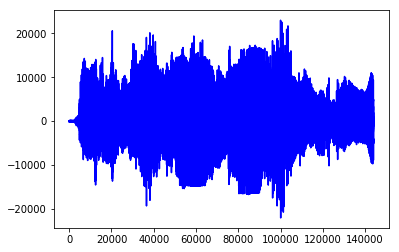

In [484]:
df_audiotesting = pd.DataFrame()
for root, dirs, files in os.walk('C:/Users/Monisri/Desktop/audio'):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            #buff = wave.open("C:/Users/Monisri/Documents/speech/Audio_Speech_Actors_01-24/"+file,'r')
            buff = wave.open(os.path.join(root, file), 'r')
            signal = buff.readframes(-1)
            signal = numpy.fromstring(signal, 'Int16')
            #sample_rate , signal = wf.read('C:/Users/Monisri/Documents/speech/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav', mmap = True) # 8kHz
            
            signal = signal[0:int(3.0 * sample_rate)]  # Keep the first 3.0 seconds
            plt.plot(signal, c='b')
            pre_emphasis = 0.9
            emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1]) #Perfect
            plt.plot(emphasized_signal, c='b')
            #sd.play(emphasized_signal)
            frame_size = 0.025
            frame_stride = 0.01

            # Convert from seconds to samples
            frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate

            signal_length = len(emphasized_signal)
            frame_length = int(round(frame_length))
            frame_step = int(round(frame_step))
            
            # Make sure that we have at least 1 frame
            num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))

            pad_signal_length = num_frames * frame_step + frame_length
            z = numpy.zeros((pad_signal_length - signal_length))
            pad_signal = numpy.append(emphasized_signal, z)

            indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, 
                            num_frames * frame_step, frame_step), (frame_length, 1)).T
            frames = pad_signal[indices.astype(numpy.int32, copy=False)]
            frames *= numpy.hamming(frame_length)
            NFFT = 512 # or 256
            mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
            pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum
            nfilt = 40
            low_freq_mel = 0
            high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
            mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
            hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
            bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

            fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
            for m in range(1, nfilt + 1):
                f_m_minus = int(bin[m - 1])   # left
                f_m = int(bin[m])             # center
                f_m_plus = int(bin[m + 1])    # right

                for k in range(f_m_minus, f_m):
                    fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
                for k in range(f_m, f_m_plus):
                    fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
            filter_banks = numpy.dot(pow_frames, fbank.T)
            filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
            filter_banks = 20 * numpy.log10(filter_banks)  # dB
            num_ceps = 12
            cep_lifter = 22 #refers to the dimensionality of the MFCC vector in the original formulation.

            mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13
            (nframes, ncoeff) = mfcc.shape
            n = numpy.arange(ncoeff)
            lift = 1 + (cep_lifter / 2) * numpy.sin(numpy.pi * n / cep_lifter)
            mfcc *= lift
            filter_banks -= (numpy.mean(filter_banks, axis=0) + 1e-8)
            mfcc -= (numpy.mean(mfcc, axis=0) + 1e-8)
            y_pred = rfc.predict(mfcc)
            s = y_pred.tolist()
            print(s)
            print(max(s,key=s.count))
            df = pd.DataFrame(mfcc)
            df['File_name'] = file
            df.head(2)
        df_audiotesting = df_audiotesting.append(df)

           

In [471]:
df_audiotesting.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,File_name
0,-111.202149,-27.742298,143.484312,55.305526,527.821995,54.047892,108.484404,62.389832,251.216983,67.001725,507.925571,104.286108,1-nice-work.wav
1,-64.878596,40.100975,195.363228,-30.544460,282.006851,33.803951,137.306889,64.380559,247.998875,-158.619287,432.531894,17.091754,1-nice-work.wav
2,-76.313529,82.537704,235.520238,-133.800016,351.917783,-209.018912,118.304297,-28.616000,75.401583,-302.251932,157.762584,-91.068292,1-nice-work.wav
3,-66.210975,130.839582,248.389142,-166.664110,481.352854,-154.068653,142.794565,22.871648,265.962470,-152.332507,225.346406,-32.076228,1-nice-work.wav
4,-68.498581,60.109666,200.496674,-61.634636,355.457835,-85.553514,105.063238,70.514789,267.707993,-108.456694,385.690598,51.274814,1-nice-work.wav
5,-39.383992,-62.064073,-93.503329,63.591632,417.504057,200.132513,-36.766118,134.189584,84.778413,-209.714735,84.038269,18.270564,1-nice-work.wav
6,-86.251469,43.559062,176.679891,-50.278805,522.016954,11.978597,274.299070,169.815474,193.348069,-157.597470,218.071613,2.471181,1-nice-work.wav
7,-52.173586,-26.408136,43.563017,30.989443,232.361429,28.469744,62.680876,-107.971352,-150.563440,-54.293787,136.061822,56.199545,1-nice-work.wav
8,-14.681799,50.396529,273.514100,250.551807,36.057094,-11.232261,38.048001,-63.179606,79.109252,71.934937,273.903558,-2.147266,1-nice-work.wav
9,34.789111,25.220184,-18.773472,37.605469,122.493231,24.195588,79.392970,33.508462,-37.663255,225.791544,25.653656,170.257316,1-nice-work.wav


In [474]:
df_audiotesting['Emotion'] = df_audiotesting['File_name'].apply(lambda s:s[0:1])


In [475]:
df_audiotesting.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,File_name,Emotion
0,-111.202149,-27.742298,143.484312,55.305526,527.821995,54.047892,108.484404,62.389832,251.216983,67.001725,507.925571,104.286108,1-nice-work.wav,1
1,-64.878596,40.100975,195.363228,-30.544460,282.006851,33.803951,137.306889,64.380559,247.998875,-158.619287,432.531894,17.091754,1-nice-work.wav,1
2,-76.313529,82.537704,235.520238,-133.800016,351.917783,-209.018912,118.304297,-28.616000,75.401583,-302.251932,157.762584,-91.068292,1-nice-work.wav,1
3,-66.210975,130.839582,248.389142,-166.664110,481.352854,-154.068653,142.794565,22.871648,265.962470,-152.332507,225.346406,-32.076228,1-nice-work.wav,1
4,-68.498581,60.109666,200.496674,-61.634636,355.457835,-85.553514,105.063238,70.514789,267.707993,-108.456694,385.690598,51.274814,1-nice-work.wav,1
5,-39.383992,-62.064073,-93.503329,63.591632,417.504057,200.132513,-36.766118,134.189584,84.778413,-209.714735,84.038269,18.270564,1-nice-work.wav,1
6,-86.251469,43.559062,176.679891,-50.278805,522.016954,11.978597,274.299070,169.815474,193.348069,-157.597470,218.071613,2.471181,1-nice-work.wav,1
7,-52.173586,-26.408136,43.563017,30.989443,232.361429,28.469744,62.680876,-107.971352,-150.563440,-54.293787,136.061822,56.199545,1-nice-work.wav,1
8,-14.681799,50.396529,273.514100,250.551807,36.057094,-11.232261,38.048001,-63.179606,79.109252,71.934937,273.903558,-2.147266,1-nice-work.wav,1
9,34.789111,25.220184,-18.773472,37.605469,122.493231,24.195588,79.392970,33.508462,-37.663255,225.791544,25.653656,170.257316,1-nice-work.wav,1


In [ ]:
audio_test = df_audiotesting[['0','1','2','3','4','5','6','7','8','9','10','11']].values

y_pred = rfc.predict(audio_test)  
